In [1]:
import pandas as pd
import spacy as sp
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter, defaultdict

import ast
import re

Processing the extractions using regex.

In [2]:
def normalize_string(s):
    """Normalize strings to make variations like 'plant' and 'plants' equal"""
    if not isinstance(s, str):
        return s
    
    s = s.lower()
    
    s = s.replace('"', '').replace("'", "")
    
    normalization_rules = [
        (r'polyketides', 'polyketide'),
        (r'flavonoids', 'flavonoid'),
        (r'alkaloids', 'alkaloid'),
        (r'steroids', 'steroid'),
        (r'terpenoids', 'terpenoid'),
        (r'\bplants?\b', 'plant'),
        (r'\bbacteri(a|um|al)?\b', 'bacteria'),
        (r'\bfungi?\b', 'fungus'),
        (r'\banimals?\b', 'animal'),
        (r'\bmicro-?organisms?\b', 'microorganism'),
        (r'\bmicro-?bes?\b', 'microorganism'),
        (r'\bmarine-?\s?organisms?\b', 'marine'),
        (r'\bactinomycetes?\b', 'actinomycete'),
        (r'\bcyanobacteria\b', 'cyanobacterium'),
        (r'\bparasites?\b', 'parasite'),
        (r'\bprotozoans?\b', 'protozoan'),
        (r'\bsponges?\b', 'sponge'),
        (r'\balgae?\b', 'alga'),
        (r'\bendophytes?\b', 'endophyte'),
        (r'\bvertebrates?\b', 'vertebrate'),
        (r'\binvertebrates?\b', 'invertebrate'),
        (r'\bmolluscs?\b', 'mollusc'),
        (r'\bcnidarians?\b', 'cnidarian'),
        (r'\bbryozoans?\b', 'bryozoan'),
        (r'\btunicates?\b', 'tunicate'),
        (r'\barthropods?\b', 'arthropod'),
        (r'\bnematodes?\b', 'nematode'),
        (r'\blichen\b', 'lichen'),
        (r'\bmushrooms?\b', 'mushroom'),
        (r'\binsects?\b', 'insect'),
        (r'\bvenoms?\b', 'venom'),
        (r'\bminerals?\b', 'mineral'),
        (r'\bcrustaceans?\b', 'crustacean'),
        (r'\bascidians?\b', 'ascidian'),
        (r'\bcoral\b', 'coral'),
        (r'\bpolychaetes?\b', 'polychaete'),
        (r'\bcoelenterates?\b', 'coelenterate'),
    ]
    
    for pattern, replacement in normalization_rules:
        s = re.sub(pattern, replacement, s)
    
    s = re.sub(r'[^a-zA-Z0-9\s]', '', s)
    s = s.strip()
    
    return s

def process_column_data(data):
    """Process column data to handle lists and normalize strings"""
    if pd.isna(data) or data == '[]':
        return []
    
    try:
        items = ast.literal_eval(data) if isinstance(data, str) else data
    except (ValueError, SyntaxError):
        items = [data]
    
    if not isinstance(items, list):
        items = [items]
    
    normalized_items = []
    for item in items:
        if isinstance(item, str):
            normalized = normalize_string(item)
            if normalized:  # Only add non-empty strings
                normalized_items.append(normalized)
    
    return list(set(normalized_items))  # Remove duplicates

df = pd.read_csv('extractions.csv')

for column in ['diseases', 'molecules', 'sources']:
    df[column] = df[column].apply(process_column_data)

extractions = df

## Sources

Selecting the sources.

In [3]:
sources = extractions['sources']
sources = list(sources)

filtered_sources = []

for source in sources:
    if source != []:
        filtered_sources.append(source)

Obtaining the frequencies:

In [4]:
corpus_sources = []

for ss in filtered_sources:
    for s in ss:
        corpus_sources.append(s)

unique_sources, freqs_sources = np.unique(corpus_sources, return_counts=True)

Plotting the top 10 sources:

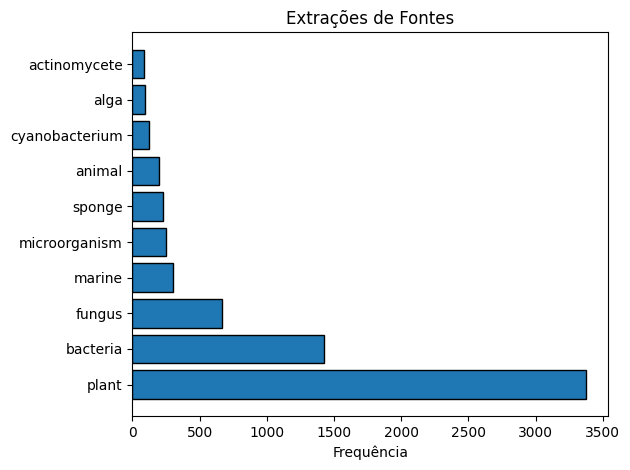

In [5]:
def get_top_n_pairs(strings, freqs, n=10):
    pairs = list(zip(strings, freqs))    
    sorted_pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
    return sorted_pairs[:n]

top_sources = get_top_n_pairs(unique_sources, freqs_sources)

strings = [pair[0] for pair in top_sources]
frequencies = [pair[1] for pair in top_sources]
plt.barh(strings, frequencies, edgecolor='k')
plt.xlabel('Frequência')
plt.title('Extrações de Fontes')
plt.xticks()  
plt.tight_layout()  
plt.show()

## Diseases

Selecting the diseases.

In [6]:
diseases = extractions['diseases']
diseases = list(diseases)

filtered_diseases = []

for disease in diseases:
    if disease != []:
        filtered_diseases.append(disease)

Obtaining the frequencies:

In [7]:
corpus_diseases = []

for dd in filtered_diseases:
    for d in dd:
        corpus_diseases.append(d)

unique_diseases, freqs_diseases = np.unique(corpus_diseases, return_counts=True)

Plotting the top 10 diseases:

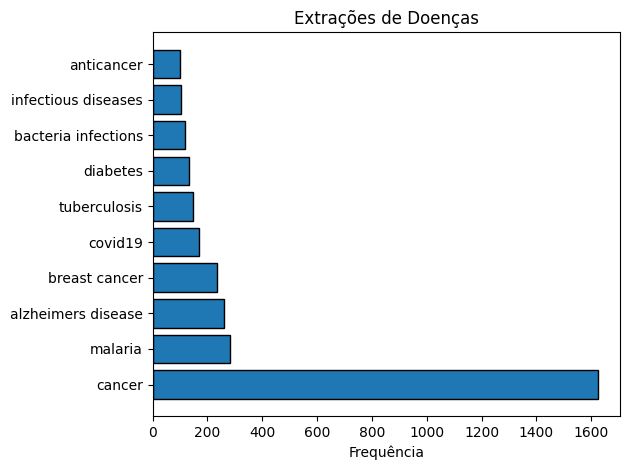

In [8]:
top_diseases = get_top_n_pairs(unique_diseases, freqs_diseases)

strings = [pair[0] for pair in top_diseases]
frequencies = [pair[1] for pair in top_diseases]
plt.barh(strings, frequencies, edgecolor='k')
plt.xlabel('Frequência')
plt.title('Extrações de Doenças')
plt.xticks()  
plt.tight_layout()  
plt.show()

## Molecules

Selecting the molecules.

In [9]:
molecules = extractions['molecules']
molecules = list(molecules)

filtered_molecules = []

for molecule in molecules:
    if molecule != []:
        filtered_molecules.append(molecule)

Obtaining the frequencies:

In [10]:
corpus_molecules = []

for mm in filtered_molecules:
    for m in mm:
        corpus_molecules.append(m)

unique_molecules, freqs_molecules = np.unique(corpus_molecules, return_counts=True)

Plotting the top 10 molecules:

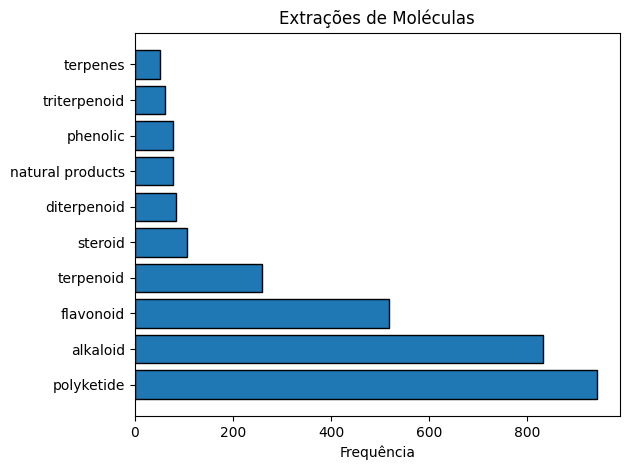

In [11]:
top_molecules = get_top_n_pairs(unique_molecules, freqs_molecules)

strings = [pair[0] for pair in top_molecules]
frequencies = [pair[1] for pair in top_molecules]
plt.barh(strings, frequencies, edgecolor='k')
plt.xlabel('Frequência')
plt.title('Extrações de Moléculas')
plt.xticks()  
plt.tight_layout()  
plt.show()

## Correlation

### Diseases x Molecules

Taking all abstracts that have both diseases and molecules.

In [12]:
correlation_diseases_molecules = extractions[
    (extractions['diseases'].apply(len) > 0) & 
    (extractions['molecules'].apply(len) > 0)
]

correlation_diseases_molecules = correlation_diseases_molecules[['diseases', 'molecules']]
correlation_diseases_molecules = correlation_diseases_molecules.dropna()

Making token pairs.

In [13]:
pairs_diseases_molecules = [
    (disease, molecule)
    for diseases, molecules in zip(correlation_diseases_molecules['diseases'], correlation_diseases_molecules['molecules'])
    for disease in diseases
    for molecule in molecules
]

In [14]:
counts_diseases_molecules = Counter(pairs_diseases_molecules)

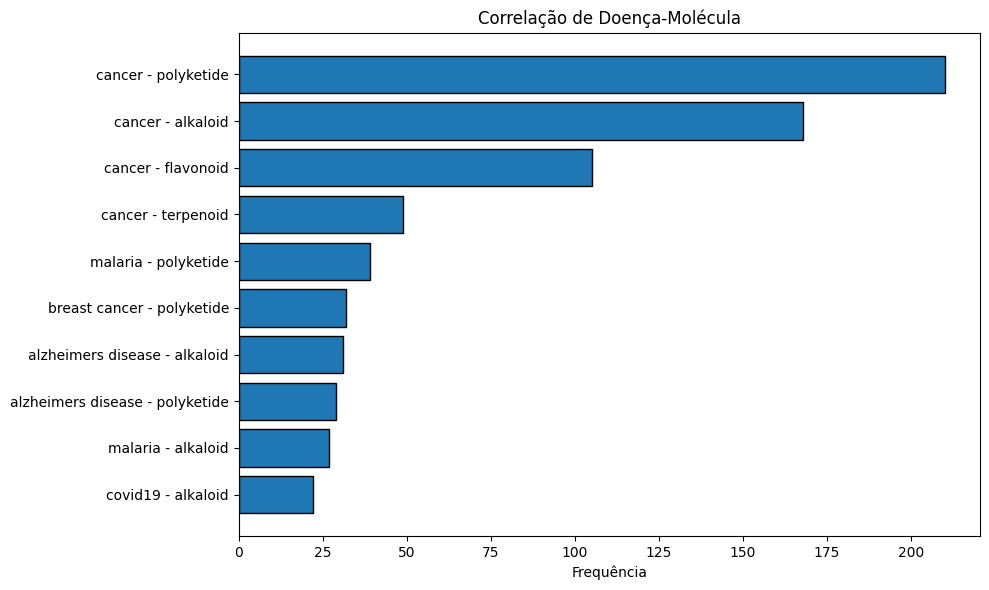

In [15]:
top_pairs_diseases_molecules = counts_diseases_molecules.most_common(10)

top_pairs = [f"{disease} - {molecule}" for (disease, molecule), count in top_pairs_diseases_molecules]
counts = [count for (disease, molecule), count in top_pairs_diseases_molecules]

plt.figure(figsize=(10, 6))
plt.barh(top_pairs, counts, edgecolor='k')  
plt.xlabel('Frequência')
plt.title('Correlação de Doença-Molécula')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Diseases x Sources

Taking all abstracts that have both diseases and sources.

In [16]:
correlation_diseases_sources = extractions[
    (extractions['diseases'].apply(len) > 0) & 
    (extractions['sources'].apply(len) > 0)
]

correlation_diseases_sources = correlation_diseases_sources[['diseases', 'sources']]
correlation_diseases_sources = correlation_diseases_sources.dropna()

Making token pairs.

In [17]:
pairs_diseases_sources = [
    (disease, source)
    for diseases, sources in zip(correlation_diseases_sources['diseases'], correlation_diseases_sources['sources'])
    for disease in diseases
    for source in sources
]

In [18]:
counts_diseases_sources = Counter(pairs_diseases_sources)

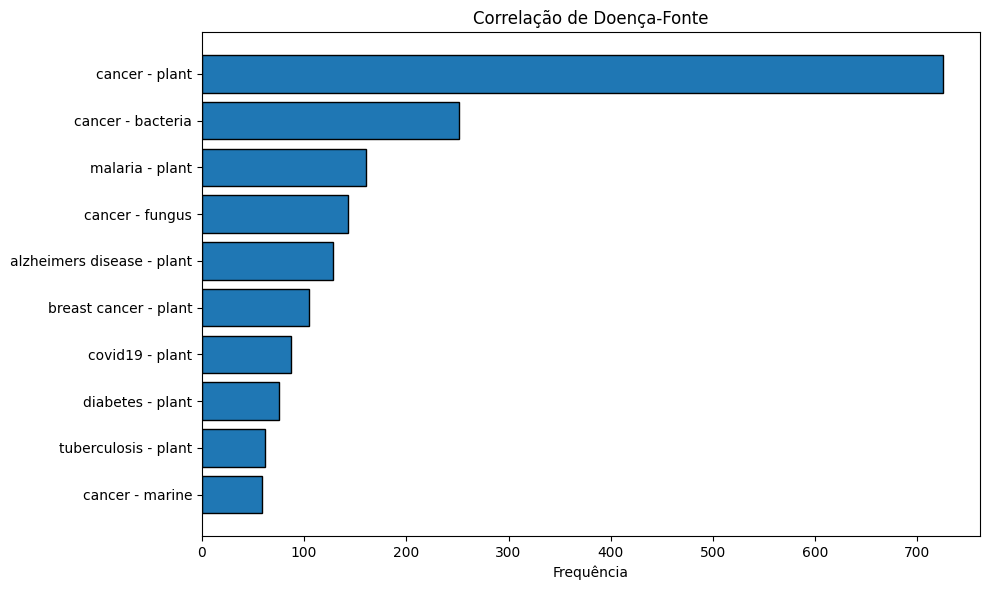

In [19]:
top_pairs_diseases_sources = counts_diseases_sources.most_common(10)

top_pairs = [f"{disease} - {source}" for (disease, source), count in top_pairs_diseases_sources]
counts = [count for (disease, source), count in top_pairs_diseases_sources]

plt.figure(figsize=(10, 6))
plt.barh(top_pairs, counts, edgecolor='k')  
plt.xlabel('Frequência')
plt.title('Correlação de Doença-Fonte')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Molecules x Sources

Taking all abstracts that have both molecules and sources.

In [20]:
correlation_molecules_sources = extractions[
    (extractions['molecules'].apply(len) > 0) & 
    (extractions['sources'].apply(len) > 0)
]

correlation_molecules_sources = correlation_molecules_sources[['molecules', 'sources']]
correlation_molecules_sources = correlation_molecules_sources.dropna()

Making token pairs.

In [21]:
pairs_molecules_sources = [
    (molecule, source)
    for molecules, sources in zip(correlation_molecules_sources['molecules'], correlation_molecules_sources['sources'])
    for molecule in molecules
    for source in sources
]

In [22]:
counts_molecules_sources = Counter(pairs_molecules_sources)

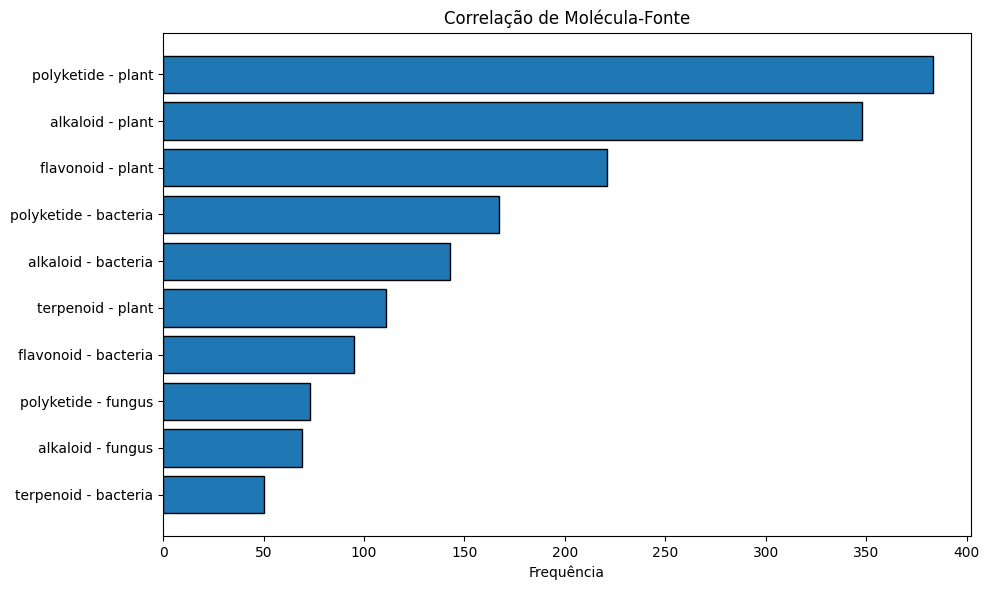

In [23]:
top_pairs_molecules_sources = counts_molecules_sources.most_common(10)

top_pairs = [f"{molecule} - {source}" for (molecule, source), count in top_pairs_molecules_sources]
counts = [count for (molecule, source), count in top_pairs_molecules_sources]

plt.figure(figsize=(10, 6))
plt.barh(top_pairs, counts, edgecolor='k')  
plt.xlabel('Frequência')
plt.title('Correlação de Molécula-Fonte')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Molecules x Sources x Diseases

Taking all abstracts that have both molecules, diseases and sources.

In [24]:
correlation_all = extractions[
    (extractions['molecules'].apply(len) > 0) & 
    (extractions['diseases'].apply(len) > 0) & 
    (extractions['sources'].apply(len) > 0)
]

correlation_all = correlation_all[['diseases', 'molecules', 'sources']]
correlation_all = correlation_all.dropna()

Making token pairs.

In [25]:
pairs_all = [
    (disease, molecule, source)
    for diseases, molecules, sources in zip(
        correlation_all['diseases'],
        correlation_all['molecules'], 
        correlation_all['sources'],
    )
    for disease in diseases
    for molecule in molecules
    for source in sources
]

In [26]:
counts_all = Counter(pairs_all)

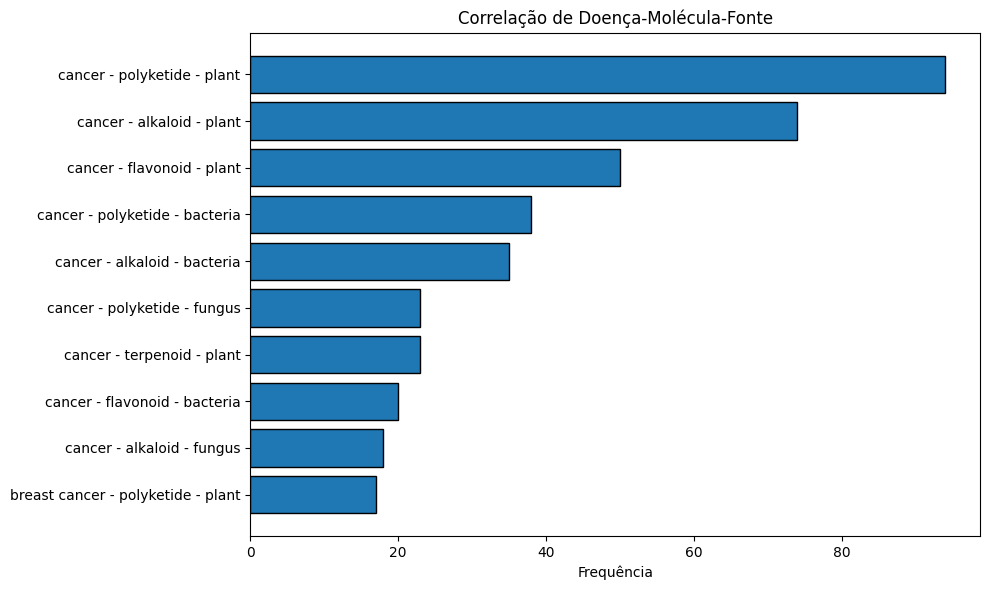

In [27]:
top_pairs_all = counts_all.most_common(10)

top_pairs = [f"{disease} - {molecule} - {source}" for (disease, molecule, source), count in top_pairs_all]
counts = [count for (disease, molecule, source), count in top_pairs_all]

plt.figure(figsize=(10, 6))
plt.barh(top_pairs, counts, edgecolor='k')  
plt.xlabel('Frequência')
plt.title('Correlação de Doença-Molécula-Fonte')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()